## NASA Patent Data – Exploratory Analysis

This notebook contains exploratory analysis performed to understand NASA patent data
and derive insights later presented in an interactive Streamlit dashboard.

The focus of this analysis is data cleaning, exploration, basic categorization,
and identifying high-level patterns across NASA research centers and patent categories.

In [1]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
#fetching NASA Data using API
def fetch_nasa_data(api_endpoint):
    try:
        # Send a GET request to the API endpoint
        response = requests.get(api_endpoint)
        response.raise_for_status()
        # Parse the response data (assuming JSON)
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None
# Define the API endpoint for NASA data
api_endpoint = "https://data.nasa.gov/docs/legacy/NASA_Patents/gquh-watm.json"
data = fetch_nasa_data(api_endpoint)


In [5]:
#creating a DataFrame
df=pd.DataFrame(data)

In [6]:
df.head(10)

,center,status,case_number,patent_number,application_sn,title,patent_expiration_date
0,NASA Kennedy Space Center,Application,KSC-12871,0,"13/033,085",Polyimide Wire Insulation Repair System,NaN
1,NASA Ames Research Center,Issued,ARC-14048-1,5694939,"08/543,093",Autogenic-Feedback Training Exercise Method & ...,2015-10-03T00:00:00.000
2,NASA Ames Research Center,Issued,ARC-14231-1,6109270,"09/017,519",Multimodality Instrument For Tissue Characteri...,2017-02-04T00:00:00.000
3,NASA Ames Research Center,Issued,ARC-14231-2DIV,6976013,"10/874,003",Metrics For Body Sensing System,2024-06-16T00:00:00.000
4,NASA Ames Research Center,Issued,ARC-14231-3,6718196,"09/652,299",Multimodality Instrument For Tissue Characteri...,2017-02-04T00:00:00.000
5,NASA Ames Research Center,Issued,ARC-14275-1,6445390,"09/226,673",Automated Triangle Geometry Processing For Sur...,2018-12-24T00:00:00.000
6,NASA Ames Research Center,Issued,ARC-14281-1,6606612,"09/374,491",Aerodynamic Design Using Neural Networks,2019-08-13T00:00:00.000
7,NASA Ames Research Center,Issued,ARC-14281-3,7191161,"10/637,087",Method For Constructing Composite Response Sur...,2020-11-18T00:00:00.000
8,NASA Ames Research Center,Issued,ARC-14359-1,6314362,"09/498,123",A Direct-To Controller Tool (A Component Of Th...,2020-02-02T00:00:00.000
9,NASA Ames Research Center,Issued,ARC-14494-1,6720984,"09/606,107",Bio-Electric Keyboard/Mouse/Joystick Interface...,2020-06-13T00:00:00.000


In [10]:
# deleting duplicates 
df.duplicated().sum()

np.int64(0)

In [ ]:
#DataFrame has no duplicate records

In [53]:

## 1. Dataset Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   center                  1000 non-null   object
 1   status                  1000 non-null   object
 2   case_number             1000 non-null   object
 3   patent_number           776 non-null    object
 4   application_sn          998 non-null    object
 5   title                   1000 non-null   object
 6   patent_expiration_date  729 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


In [11]:
 ## 3. Data Cleaning
#Removing two rows where we do not have application_sn 
df1 = df.dropna(subset=['application_sn'])
# Converting Patent Expiration date to date time format 
df1['patent_expiration_date'] = pd.to_datetime(
    df1['patent_expiration_date'],
    errors='coerce'
)
df1['patent_expiration_date']

C:\Users\HP\AppData\Local\Temp\ipykernel_5112\2699544972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['patent_expiration_date'] = pd.to_datetime(


0            NaT
1     2015-10-03
2     2017-02-04
3     2024-06-16
4     2017-02-04
         ...    
994   2032-04-04
995   2033-08-09
997   2033-05-23
998   2033-06-13
999   2033-02-20
Name: patent_expiration_date, Length: 998, dtype: datetime64[ns]

In [55]:
## 4. Patent Categorization

In [12]:

def categorize_title(title):
    title = title.lower()

    categories = {
        'Materials': [
            'aerogel', 'nanoparticles', 'superalloy', 'inventory'
        ],
        'Navigation': [
            'gps'
        ],
        'Mechanics': [
            'memory', 'actuator'
        ],
        'Semiconductors': [
            'semiconductors'
        ],
        'Sensors': [
            'rocket', 'sensor', 'nanosensors', 'igniter', 'nanotechnology'
        ],
        'Chemical Sciences': [
            'coatings', 'synthesis', 'cathode', 'polyimides', 'control-rods',
            'oxide', 'iridium', 'ph', 'polymeric', 'halon', 'waste drying',
            'oxygen', 'purify', 'molecule', 'ion', 'temperature', 'crystal',
            'polyimide', 'carbon', 'wire', 'hydrocarbon', 'deposit', 'composite'
        ],
        'Biological Sciences': [
            'health', 'metabolic', 'autopoiesis', 'genetics', 'autogenic',
            'cellulose', 'immune', 'weather', 'biotechnology', 'speech',
            'noise', 'auditory', 'pharmaceuticals', 'medical devices',
            'microbiology', 'body', 'tissue', 'sensing', 'bio', 'plasma'
        ],
        'Physical Sciences': [
            'ultrasonic', 'wavelength', 'launch adapter system', 'balance',
            'bearing', 'detector', 'bandwidth', 'tire', 'stress',
            'cooling systems', 'solar', 'fuel', 'hovercraft', 'magnet',
            'electronic', 'image', 'phase', 'thermocouple', 'thrust',
            'multiplexing', 'locking', 'impedence', 'amplitude', 'welding',
            'antenna', 'battery', 'charge', 'bearings', 'conductivity',
            'gear', 'ohmic', 'planetarium', 'power', 'sunphotometer',
            'generator', 'planar', 'foil bearing', 'engine', 'circuit',
            'resistance', 'shock', 'light', 'quantum', 'efficiency',
            'trajectory', 'aircraft', 'spatial', 'regulator', 'flywheel',
            'alternator', 'aerodynamic'
        ],
        'Finance': [
            'finance'
        ],
        'Aerospace': [
            'aerospace', 'space', 'flextures', 'ablators'
        ],
        'Mathematics': [
            'geometry', 'triangle', 'radius'
        ],
        'Technology': [
            'software', 'real time', '3-d', 'project management', 'neural',
            'information', 'display', 'ram', 'neuron', 'laser', 'bit',
            'keyboard', 'simulation'
        ],
        'Air Traffic Management': [
            'atm'
        ],
        'Databases': [
            'xml', 'database'
        ]
    }

    for category, keywords in categories.items():
        if any(word in title for word in keywords):
            return category

    return 'Other'


In [22]:
df1['Patent_Category'] = df1['title'].apply(categorize_title)
df1['Patent_Category']

C:\Users\HP\AppData\Local\Temp\ipykernel_5112\2863328804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Patent_Category'] = df1['title'].apply(categorize_title)


0        Chemical Sciences
1      Biological Sciences
2        Chemical Sciences
3      Biological Sciences
4        Chemical Sciences
              ...         
994      Chemical Sciences
995      Chemical Sciences
997      Chemical Sciences
998      Physical Sciences
999      Chemical Sciences
Name: Patent_Category, Length: 998, dtype: object

In [23]:
Grouped1 = df1[df1['status'] == 'Issued'].groupby('center').count()

df2=pd.DataFrame(Grouped1)
df2.reset_index(inplace=True)
df2=df2[['center','status']]

In [24]:
df2.columns

Index(['center', 'status'], dtype='object')

In [25]:
#plotting patents by Category

dfx=df1['Patent_Category'].value_counts()
dfxx=pd.DataFrame(dfx)
dfxx

,count
Patent_Category,
Chemical Sciences,572
Physical Sciences,138
Other,101
Sensors,81
Technology,31
Biological Sciences,29
Mechanics,21
Materials,11
Aerospace,8


Text(0.5, 1.0, 'Patent Categories')

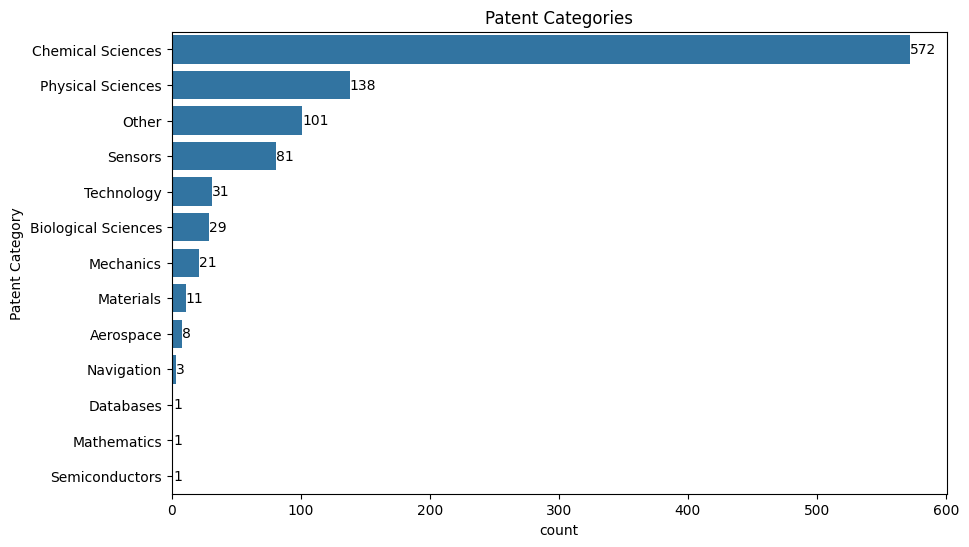

In [26]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=dfxx, x='count', y='Patent_Category',orient='h')
ax.bar_label(ax.containers[0])
# Set x and y labels
plt.xlabel('count')  # X-axis label
plt.ylabel('Patent Category')      # Y-axis label

# Set title for the chart
plt.title('Patent Categories')



In [27]:
pending_pt = df1[df1['status'] == 'Application'].groupby('center').size().reset_index(name='Pending_Patents_Count')
dt1=pd.DataFrame(pending_pt)
Issued_pt = df1[df1['status'] == 'Issued'].groupby('center').size().reset_index(name='Issued_Patents_Count')
dt2=pd.DataFrame(Issued_pt)
print(dt2)
merged_df = pd.merge(dt1, dt2, on='center', how='inner', suffixes=('_dt1', '_dt2'))
merged_df


                                  center  Issued_Patents_Count
0              NASA Ames Research Center                   100
1  NASA Armstrong Flight Research Center                    12
2             NASA Glenn Research Center                   107
3       NASA Goddard Space Flight Center                   129
4                      NASA Headquarters                     1
5              NASA Kennedy Space Center                    58
6           NASA Langley Research Center                   239


,center,Pending_Patents_Count,Issued_Patents_Count
0,NASA Ames Research Center,38,100
1,NASA Armstrong Flight Research Center,9,12
2,NASA Glenn Research Center,101,107
3,NASA Goddard Space Flight Center,64,129
4,NASA Kennedy Space Center,29,58
5,NASA Langley Research Center,110,239


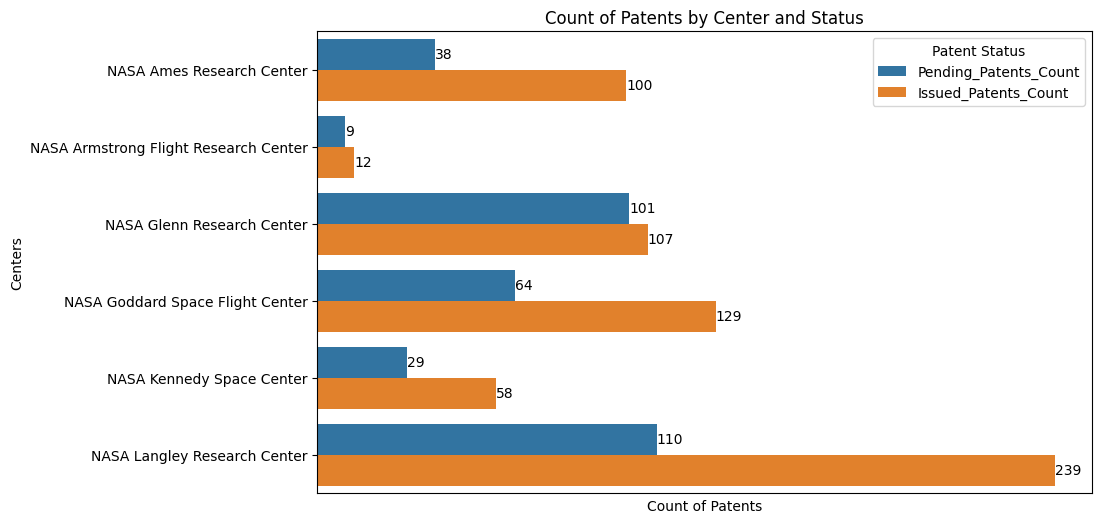

In [28]:
#Analyzing  NASA Center and their  status to understand which centers are producing more successful patents.

df_melted = merged_df.melt(id_vars='center', value_vars=['Pending_Patents_Count', 'Issued_Patents_Count'], 
                    var_name='status', value_name='count')

# Create the bar chart with hue
plt.figure(figsize=(10, 6))
ax=sns.barplot(data=df_melted, x='count', y='center', hue='status')

# Customize the plot
plt.title("Count of Patents by Center and Status")
plt.xlabel("Count of Patents")
plt.ylabel("Centers")
plt.xticks(rotation=75)  # Rotate x labels for better readability
plt.legend(title='Patent Status')
plt.xticks([])

for container in ax.containers:
    ax.bar_label(container)

In [29]:
df_status=df1['status'].value_counts()
df_status=pd.DataFrame(df_status)
df_status.reset_index(inplace=True)
df_status

,status,count
0,Issued,646
1,Application,352


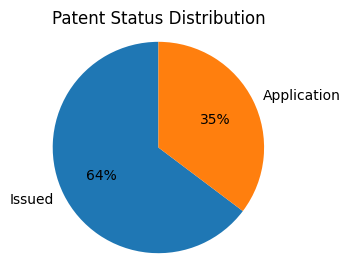

In [30]:
#Patents Status
plt.figure(figsize=(3, 3))  # Optional: set figure size
plt.pie(df_status['count'],labels=df_status['status'],autopct='%1d%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#d62728'])

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set title for the pie chart
plt.title('Patent Status Distribution')

# Show the plot
plt.show()

Summary

Collected patent data from the NASA website using an API.

Analyzed key columns and overall structure of the dataset.

Removed rows with missing values to improve data quality.

Categorized patents into 14 technology categories based on title keywords.

Plotted a bar chart to identify the most common patent categories.

Created a word cloud to highlight frequently occurring technologies.

Analyzed patent distribution across NASA Centers and patent status.

Insights

Patents were categorized into different domains using a rule-based approach.

Word cloud analysis shows that Chemical Sciences is the most dominant category.

NASA Langley Research Center has the highest number of issued patents.

Approximately 64.7% of patents are issued, while 35.3% are pending.